In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils import resample

In [2]:
# Load and inspect the dataset
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
# Display dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 


In [4]:
# Check for missing values
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


# EDA 

In [5]:
# Drop 'LoanID' as it's not useful for prediction
df.drop('LoanID', axis=1, inplace=True)

In [6]:
# Separating numerical and categorical columns
num_col = df.select_dtypes(exclude=['object']).columns
cat_col = df.select_dtypes(include=['object']).columns


Visualizing target variable 'Default':


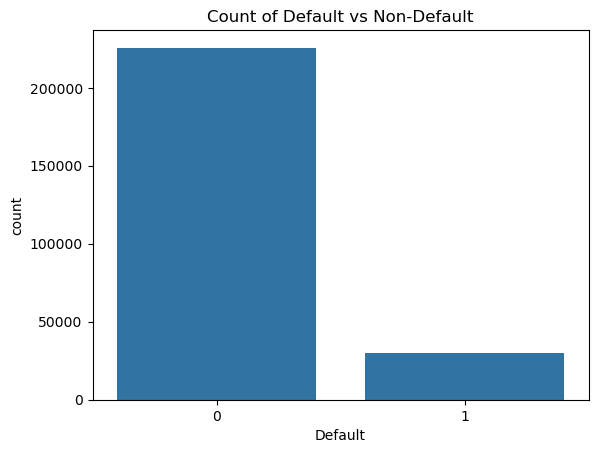

In [7]:
# Visualizing the target variable 'Default'
print("\nVisualizing target variable 'Default':")
sns.countplot(data=df, x='Default')
plt.title('Count of Default vs Non-Default')
plt.show()


Visualizing numerical features by 'Default':


C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


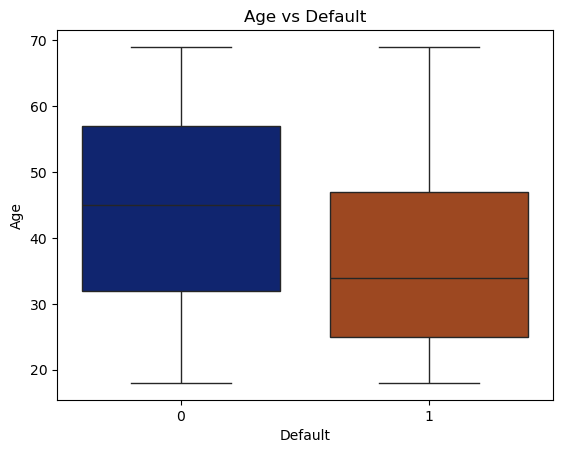

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


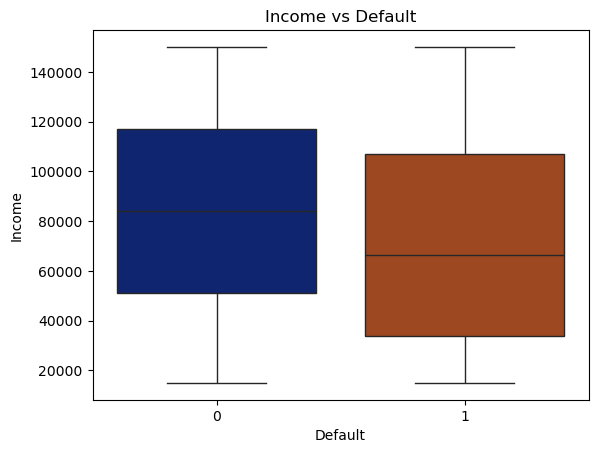

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


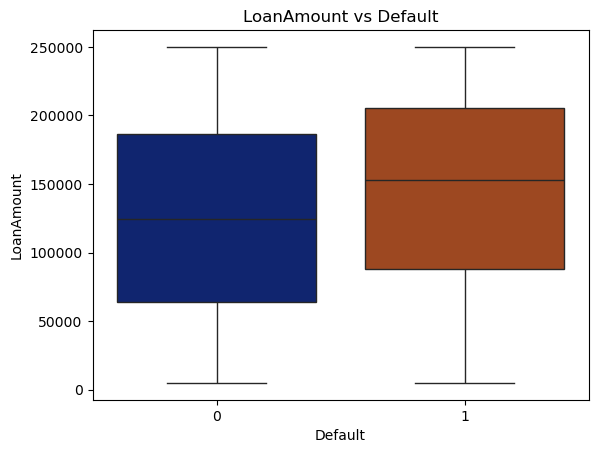

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


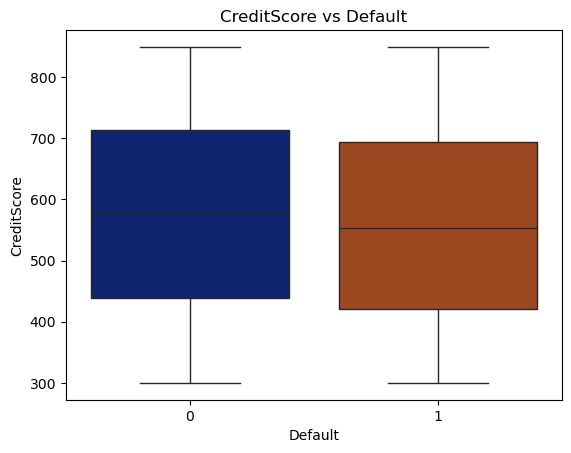

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


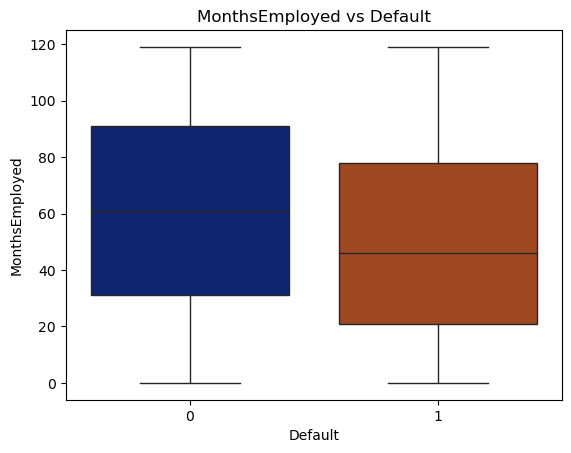

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


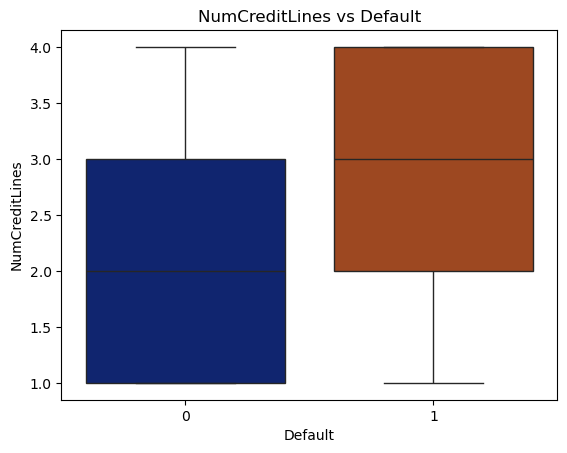

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


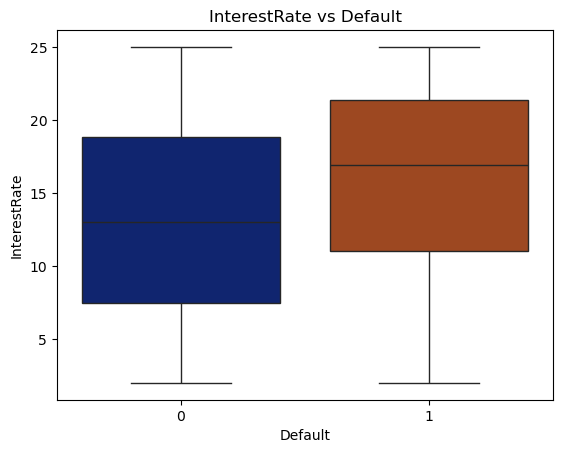

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


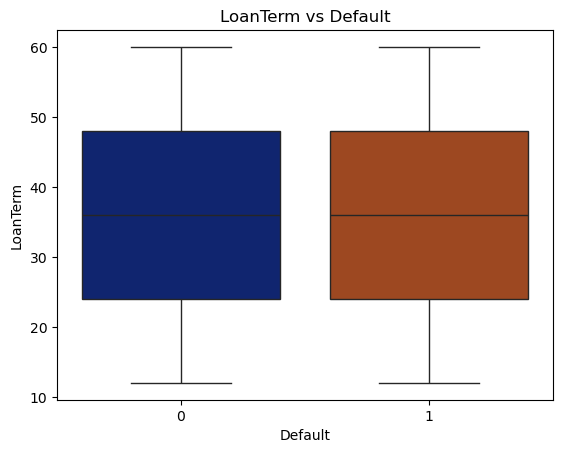

C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_24768\2051710551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=col, data=df, palette='dark')


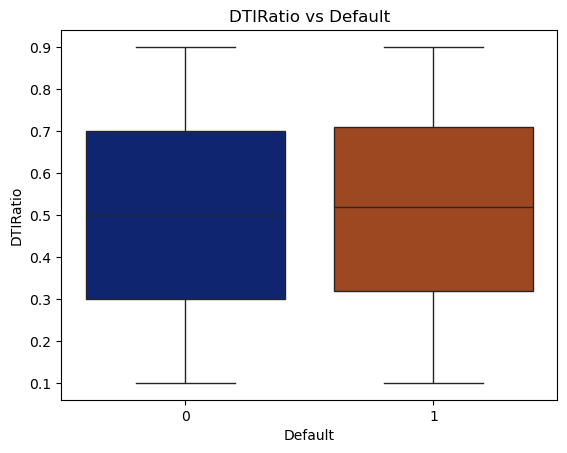

In [8]:
# Visualizing numerical columns with respect to the target
print("\nVisualizing numerical features by 'Default':")
for col in num_col:
    if col != 'Default':  # Exclude target column
        sns.boxplot(x='Default', y=col, data=df, palette='dark')
        plt.title(f'{col} vs Default')
        plt.show()

# Data Preprocessing 

In [9]:
# Encoding binary categorical columns
le = LabelEncoder()
binary_col = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_col:
    df[col] = le.fit_transform(df[col])

In [10]:
# Encoding other categorical columns using one-hot encoding
categorical_col = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=categorical_col, drop_first=True).astype('float')

In [11]:
# Standardizing numerical columns
numerical_col = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio']
scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [12]:
# Handling class imbalance through upsampling the minority class
majority_class = df[df['Default'] == 0]
minority_class = df[df['Default'] == 1]
df_minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
df_upsampled = pd.concat([majority_class, df_minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Modeling

In [13]:
# Splitting data into features (X) and target (y)
X = df_upsampled.drop('Default', axis=1)
y = df_upsampled['Default']

In [14]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Training the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Making predictions on training and test sets
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

In [17]:
# Evaluating model performance on training data
print("\nTraining Set Performance:")
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))


Training Set Performance:
[[180841      0]
 [     0 180269]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180841
         1.0       1.00      1.00      1.00    180269

    accuracy                           1.00    361110
   macro avg       1.00      1.00      1.00    361110
weighted avg       1.00      1.00      1.00    361110



In [18]:
# Evaluating model performance on test data
print("\nTest Set Performance:")
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))


Test Set Performance:
[[44181   672]
 [   88 45337]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     44853
         1.0       0.99      1.00      0.99     45425

    accuracy                           0.99     90278
   macro avg       0.99      0.99      0.99     90278
weighted avg       0.99      0.99      0.99     90278




Confusion Matrix for Test Data:


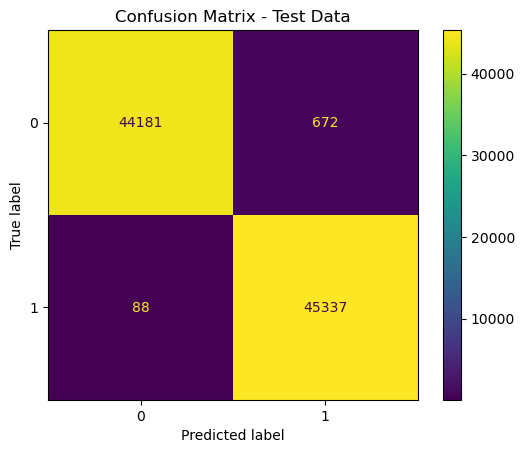

In [19]:
# Visualizing the Confusion Matrix for test data
print("\nConfusion Matrix for Test Data:")
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Test Data')
plt.show()